###### Importing Packages

In [1]:
import pandas as pd
pd.set_option('max_rows',100)
import numpy 
import matplotlib.pyplot as plt
import csv
import xlrd
%matplotlib inline
plt.style.use('ggplot')

###### Reading Data

In [2]:
enrollments = pd.read_csv('enrollments.csv')
daily_engagement = pd.read_csv('daily_engagement.csv')
submission = pd.read_csv('project_submissions.csv')
submission.creation_date = pd.to_datetime(submission.creation_date)
submission.completion_date = pd.to_datetime(submission.completion_date)
submission['days_taken_evaluate'] = submission.completion_date - submission.creation_date
submission.days_taken_evaluate = submission.days_taken_evaluate.dt.days

###### Looking data

In [3]:
enrollments.count()

account_key       1640
status            1640
join_date         1640
cancel_date        988
days_to_cancel     988
is_udacity        1640
is_canceled       1640
dtype: int64

In [4]:
daily_engagement.count()

acct                     136240
utc_date                 136240
num_courses_visited      136240
total_minutes_visited    136240
lessons_completed        136240
projects_completed       136240
dtype: int64

In [5]:
submission.count()

creation_date          3642
completion_date        3636
assigned_rating        3636
account_key            3642
lesson_key             3642
processing_state       3642
days_taken_evaluate    3636
dtype: int64

In [6]:
enrollments.head()

,account_key,status,join_date,cancel_date,days_to_cancel,is_udacity,is_canceled
0,448,canceled,2014-11-10,2015-01-14,65.0,True,True
1,448,canceled,2014-11-05,2014-11-10,5.0,True,True
2,448,canceled,2015-01-27,2015-01-27,0.0,True,True
3,448,canceled,2014-11-10,2014-11-10,0.0,True,True
4,448,current,2015-03-10,NaN,NaN,True,False


In [7]:
daily_engagement.head()

,acct,utc_date,num_courses_visited,total_minutes_visited,lessons_completed,projects_completed
0,0,2015-01-09,1.0,11.679374,0.0,0.0
1,0,2015-01-10,2.0,37.284887,0.0,0.0
2,0,2015-01-11,2.0,53.633746,0.0,0.0
3,0,2015-01-12,1.0,33.489270,0.0,0.0
4,0,2015-01-13,1.0,64.779678,0.0,0.0


In [8]:
submission.head()

,creation_date,completion_date,assigned_rating,account_key,lesson_key,processing_state,days_taken_evaluate
0,2015-01-14,2015-01-16,UNGRADED,256,3176718735,EVALUATED,2.0
1,2015-01-10,2015-01-13,INCOMPLETE,256,3176718735,EVALUATED,3.0
2,2015-01-20,2015-01-20,PASSED,256,3176718735,EVALUATED,0.0
3,2015-03-10,2015-03-13,PASSED,434,3176718735,EVALUATED,3.0
4,2015-02-17,2015-03-03,INCOMPLETE,434,3176718735,EVALUATED,14.0


# Why total no of students in engagement table differs from enrollment

In [9]:
len(enrollments.account_key.unique())

1302

In [10]:
len(daily_engagement.acct.unique())

1237

In [11]:
account_key_daily = daily_engagement.acct.unique()
condition = enrollments.account_key.isin(account_key_daily)
df_enrollment_no_engagement = enrollments.loc[~condition,:]

In [12]:
df_enrollment_no_engagement.head()

,account_key,status,join_date,cancel_date,days_to_cancel,is_udacity,is_canceled
65,1219,canceled,2014-11-12,2014-11-12,0.0,False,True
75,871,canceled,2014-11-13,2014-11-13,0.0,False,True
193,1218,canceled,2014-11-15,2014-11-15,0.0,False,True
216,654,canceled,2014-12-04,2014-12-04,0.0,False,True
217,654,canceled,2014-12-04,2014-12-04,0.0,False,True


###### Reason for this
1. Udacity admin account
2. Cnacelled subsription on same day

# Removing data of udacity account

In [13]:
condition = (enrollments.is_udacity == False)
enrollments = enrollments.loc[condition,:]

In [14]:
enrollments.count()

account_key       1622
status            1622
join_date         1622
cancel_date        973
days_to_cancel     973
is_udacity        1622
is_canceled       1622
dtype: int64

# Analysis on Erollment

###### Total no of studnets enrollments

In [15]:
len(enrollments.account_key.unique())

1296

###### Cancelled students vs current studnets

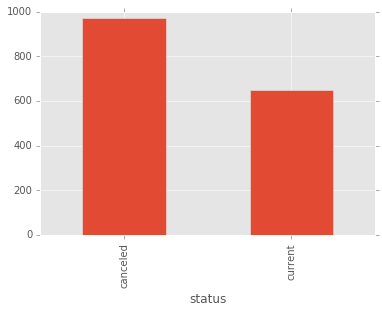

In [16]:
enrollments.groupby(enrollments.status).status.count().plot(kind='bar')

###### For how long a student subscribe for enrollment

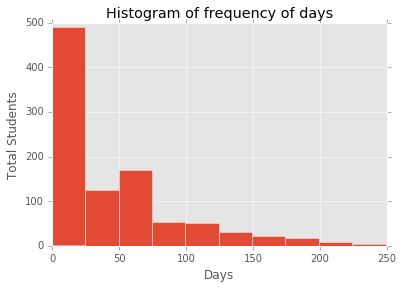

In [17]:
condition = enrollments.status == 'canceled'
df = enrollments.loc[condition,:]
daysdata = df.days_to_cancel
plt.hist(daysdata.as_matrix())
plt.xlabel('Days')
plt.ylabel('Total Students')
plt.title('Histogram of frequency of days')


In [18]:
#Average days to cancel
df.days_to_cancel.mean()

44.057553956834532

# Daily Engagement Analysis

In [19]:
daily_engagement.head()

,acct,utc_date,num_courses_visited,total_minutes_visited,lessons_completed,projects_completed
0,0,2015-01-09,1.0,11.679374,0.0,0.0
1,0,2015-01-10,2.0,37.284887,0.0,0.0
2,0,2015-01-11,2.0,53.633746,0.0,0.0
3,0,2015-01-12,1.0,33.489270,0.0,0.0
4,0,2015-01-13,1.0,64.779678,0.0,0.0


###### Average of various fields

In [20]:
#Total courses
daily_engagement.num_courses_visited.mean()

0.34105989430416911

In [21]:
#Total minutes 
daily_engagement.total_minutes_visited.mean()

24.551679885756524

In [22]:
#Total lessons
daily_engagement.lessons_completed.mean()

0.12879477392836172

In [23]:
#Total Projects
daily_engagement.projects_completed.mean()

0.0067307692307692311

###### Total minutes visited by all student during enrollment

In [24]:
daily_engagement.groupby([daily_engagement.acct]).total_minutes_visited.sum().head()

acct
0    7605.371411
1    4296.244476
2    2977.430045
3    4422.018919
4    3722.648850
Name: total_minutes_visited, dtype: float64

###### Total No of courses visited during enrollment

In [25]:
daily_engagement.groupby([daily_engagement.acct]).num_courses_visited.sum().head()

acct
0    108.0
1     52.0
2     39.0
3     59.0
4     40.0
Name: num_courses_visited, dtype: float64

###### Total lessons completed by all studnets during enrollment

In [26]:
daily_engagement.groupby([daily_engagement.acct]).lessons_completed.sum().head()

acct
0    40.0
1    23.0
2     9.0
3    42.0
4    18.0
Name: lessons_completed, dtype: float64

###### Total projects completed by all students during enrollment

In [27]:
daily_engagement.groupby([daily_engagement.acct]).projects_completed.sum().head()

acct
0    2.0
1    0.0
2    0.0
3    2.0
4    0.0
Name: projects_completed, dtype: float64

# Submission Analysis

In [28]:
submission.head()

,creation_date,completion_date,assigned_rating,account_key,lesson_key,processing_state,days_taken_evaluate
0,2015-01-14,2015-01-16,UNGRADED,256,3176718735,EVALUATED,2.0
1,2015-01-10,2015-01-13,INCOMPLETE,256,3176718735,EVALUATED,3.0
2,2015-01-20,2015-01-20,PASSED,256,3176718735,EVALUATED,0.0
3,2015-03-10,2015-03-13,PASSED,434,3176718735,EVALUATED,3.0
4,2015-02-17,2015-03-03,INCOMPLETE,434,3176718735,EVALUATED,14.0


###### Average days taken to evaluate 

In [29]:
submission.days_taken_evaluate.mean()

3.5319031903190319

###### How many ratings were assigned

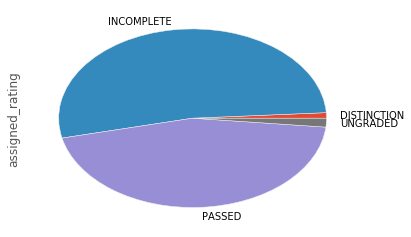

In [30]:
submission.groupby(submission.assigned_rating).assigned_rating.count().plot(kind='pie')

###### Processing state of projects

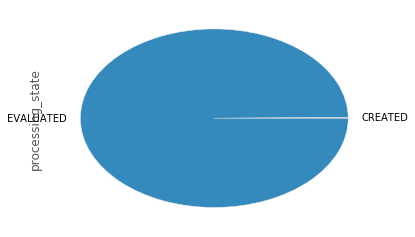

In [31]:
submission.groupby(submission.processing_state).processing_state.count().plot(kind='pie')

###### Maximum lessons submitted by students

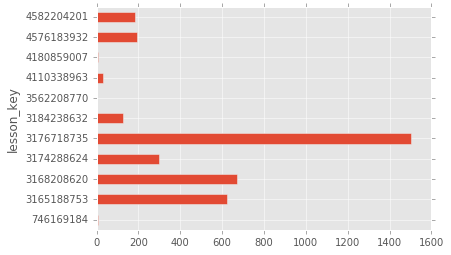

In [32]:
submission.groupby(submission.lesson_key).lesson_key.count().plot(kind='barh')

###### Total Submissions by each student

In [33]:
submission.groupby(submission.account_key).account_key.count().head()

account_key
0    7
1    3
2    1
3    5
4    7
Name: account_key, dtype: int64

###### Students that submitted atleast one paseed project

In [34]:
condition = submission.assigned_rating.isin(['PASSED','DISTINCTION'])
df_passed_atleast_one = submission.loc[condition,:]
student_passed_atleast_one = df_passed_atleast_one.account_key.unique()

###### Studnets that submitted atleast one incomplete assignment

In [35]:
condition = submission.assigned_rating.isin(['INCOMPLETE'])
df_incomplete_atleast_one = submission.loc[condition,:]
student_incomplete_atleast_one = df_incomplete_atleast_one.account_key.unique()

###### Studnet who failed to submit any complete assignment

In [36]:
condition = df_incomplete_atleast_one.account_key.isin(df_passed_atleast_one.account_key)
df_incomplete = df_incomplete_atleast_one.loc[~condition,:]
student_incomplete = df_incomplete.account_key.unique()

# What is differnece in students whose projects Passed vs Failed

In [37]:
daily_engagement.head()

,acct,utc_date,num_courses_visited,total_minutes_visited,lessons_completed,projects_completed
0,0,2015-01-09,1.0,11.679374,0.0,0.0
1,0,2015-01-10,2.0,37.284887,0.0,0.0
2,0,2015-01-11,2.0,53.633746,0.0,0.0
3,0,2015-01-12,1.0,33.489270,0.0,0.0
4,0,2015-01-13,1.0,64.779678,0.0,0.0


###### Daily engagement of passed students

In [38]:
condition = daily_engagement.acct.isin(student_passed_atleast_one)
daily_passed = daily_engagement.loc[condition,:]
average_minute_passed = daily_passed.groupby(daily_passed.acct).total_minutes_visited.sum().mean()

###### Daily engagement of failed studnets

In [39]:
condition = daily_engagement.acct.isin(student_incomplete)
daily_incomplete = daily_engagement.loc[condition,:]
average_minute_incomplete = daily_incomplete.groupby(daily_incomplete.acct).total_minutes_visited.sum().mean()

###### Graph of failed vs passed

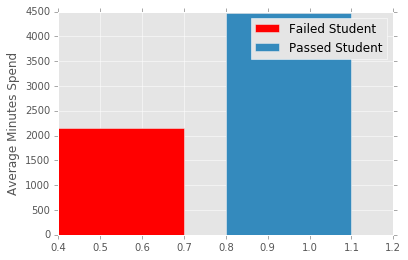

In [40]:
labels = [0,1]
values = [average_minute_incomplete,average_minute_passed]
# plt.bar(labels,values)
plt.bar(0.4,int(average_minute_incomplete),label='Failed Student',color='r',width=0.3)
plt.bar(0.8,int(average_minute_passed),label='Passed Student',width=0.3)
plt.ylabel('Average Minutes Spend')
plt.legend()
plt.show()

# How engagement change over time

In [41]:
daily_engagement.head()

,acct,utc_date,num_courses_visited,total_minutes_visited,lessons_completed,projects_completed
0,0,2015-01-09,1.0,11.679374,0.0,0.0
1,0,2015-01-10,2.0,37.284887,0.0,0.0
2,0,2015-01-11,2.0,53.633746,0.0,0.0
3,0,2015-01-12,1.0,33.489270,0.0,0.0
4,0,2015-01-13,1.0,64.779678,0.0,0.0


In [42]:
df = daily_engagement.groupby([daily_engagement.acct,daily_engagement.utc_date]).sum().reset_index()

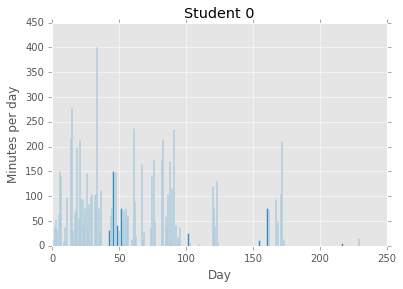

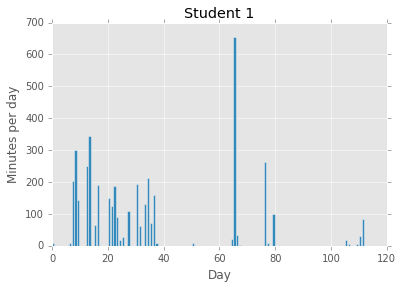

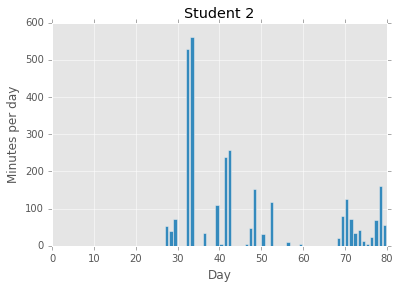

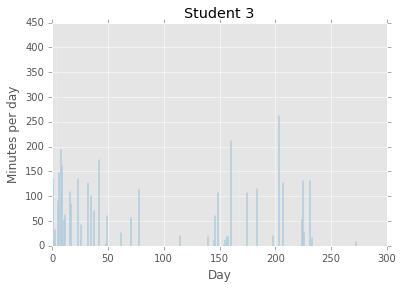

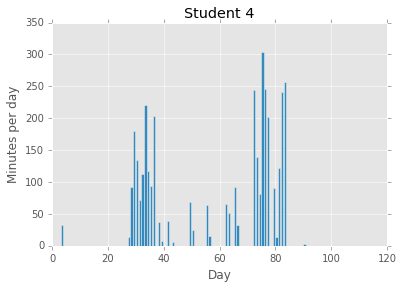

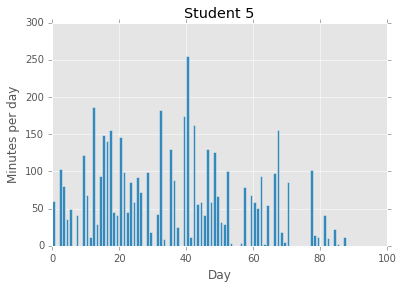

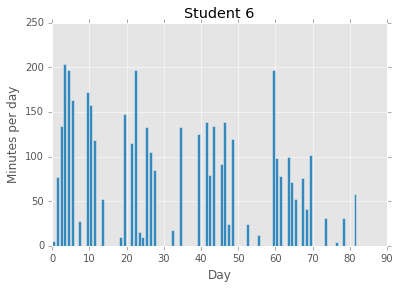

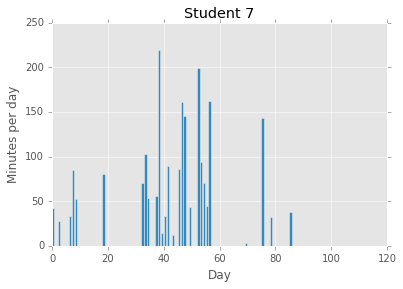

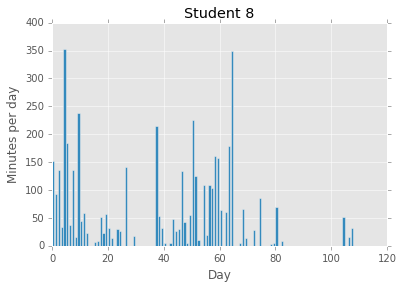

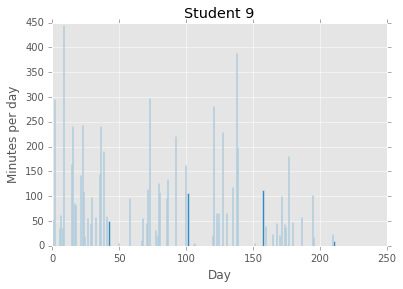

In [53]:
timedict = {}
totalacct = df.acct.unique()
counter = 0
for singleacct in totalacct:
    condition = df.acct == singleacct
    timedict[singleacct] = df.loc[condition,:].total_minutes_visited
    pass

for key in timedict:
    if counter < 10:
        plt.bar(range(len(timedict[key])),timedict[key])
        plt.title('Student '+str(key))
        plt.xlabel('Day')
        plt.ylabel('Minutes per day')
        plt.show()
    counter += 1